### This script contains the following:
#### 1. Import data and libraries
#### 2. Wrangle the data
#### 3. Merge the dataframes
#### 4. Clean the data
#### 5. Save the GeoDataframe
#### 6. Plot a choropleth using Geoplot

### 1. Import data and libraries

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import geopandas as gpd
import geoplot

In [135]:
# Prompt matplotlib visuals to appear in the notebook

%matplotlib inline

In [136]:
# Path to main project folder

path = r'C:\Users\Mark\_Electric Power Plant Emissions'

In [137]:
# Import ".shp" file for the U.S. shape outline

usa_shp = gpd.read_file(os.path.join(path, '02 Data', 'Original Data', 'USA_States.shp'))

In [138]:
# Import the "emissions" data

df = pd.read_pickle(os.path.join(path, '03 Scripts', 'Prepared Data', 'emissions2016-2019-clean-el.pkl'))

In [139]:
# Ensure nothing looks out of place with the imported dataframe

usa_shp.head()

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry
0,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
1,Montana,30,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
2,Maine,23,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
3,North Dakota,38,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."
4,South Dakota,46,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9..."


In [140]:
# Ensure nothing looks out of place with the imported dataframe

df.head()

,Plant Code,Year,Plant Name,State,Sector Group,Sector Code,Prime Mover,Fuel Code,Aggregated Fuel Group,Generation (kWh),...,Fuel Use(useful thermal output MMBtu),Fuel Consumed Qty,Fuel Units,Tons of CO2 Emissions,CO2 Emissions Metric Tonnes,NERC Region,Balancing Authority Code,Balancing Authority Name,EIA Balancing Authority Region,Emission Levels
0,3,2016,Barry,AL,Electric Power,1,CA,NG,GAS,2918277000,...,0,878457,Mcf,52374.0,47513.0,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast,low
1,3,2016,Barry,AL,Electric Power,1,CT,NG,GAS,5483083000,...,0,56694492,Mcf,3380728.0,3066976.0,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast,high
2,3,2016,Barry,AL,Electric Power,1,ST,BIT,COAL,4278313064,...,0,2044002,Tons,4436536.0,4024799.0,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast,high
3,3,2016,Barry,AL,Electric Power,1,ST,NG,GAS,91217936,...,0,908006,Mcf,54172.0,49144.0,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast,low
4,7,2016,Gadsden,AL,Electric Power,1,ST,NG,GAS,190978000,...,404532,2570783,Mcf,152816.0,138633.0,SERC,SOCO,"Southern Company Services, Inc. - Trans",Southeast,low


In [141]:
# Check rows and columns

usa_shp.shape

(51, 4)

In [142]:
# Check rows and columns

df.shape

(21480, 23)

### 2. Wrangle the data

In [143]:
# Review main dataframe states

df.State.unique()

array(['AL', 'TX', 'MN', 'LA', 'KY', 'NE', 'AK', 'NM', 'WA', 'KS', 'AZ',
       'SC', 'FL', 'CA', 'OK', 'AR', 'UT', 'IL', 'CO', 'CT', 'VT', 'DE',
       'MD', 'MO', 'GA', 'HI', 'ID', 'IN', 'NC', 'IA', 'ME', 'MA', 'MI',
       'MS', 'MT', 'WY', 'NV', 'NH', 'NJ', 'NY', 'ND', 'OH', 'PA', 'RI',
       'SD', 'TN', 'VA', 'WV', 'WI', 'OR', 'DC'], dtype=object)

In [144]:
# Review the shape dataframe states

usa_shp.STATE_ABBR.unique()

array(['WA', 'MT', 'ME', 'ND', 'SD', 'WY', 'WI', 'ID', 'VT', 'MN', 'OR',
       'NH', 'IA', 'MA', 'NE', 'NY', 'PA', 'CT', 'RI', 'NJ', 'IN', 'NV',
       'UT', 'CA', 'OH', 'IL', 'DC', 'DE', 'WV', 'MD', 'CO', 'KY', 'KS',
       'VA', 'MO', 'AZ', 'OK', 'NC', 'TN', 'TX', 'NM', 'AL', 'MS', 'GA',
       'SC', 'AR', 'LA', 'FL', 'MI', 'HI', 'AK'], dtype=object)

In [145]:
# Before merging, ensure the main dataframe "merge column" has the exact same name as the Geopandas dataframe "merge column"
# This is done because the merge is into the Geopandas dataframe ("usa_shp"), on the "STATE_ABBR" column

df.rename(columns = {'State' : 'STATE_ABBR'}, inplace = True)

### 3. Merge the dataframes

In [146]:
# Merge the main pandas dataframe (df) into the "usa_shp" Geopandas dataframe, on the "STATE_ABBR" column

usa_shp_merge = usa_shp.merge(df, on = 'STATE_ABBR', how = 'outer', indicator = True)

In [147]:
# Review to be sure it is a GeoDataFrame

type(usa_shp_merge)

geopandas.geodataframe.GeoDataFrame

In [148]:
# Review the number of rows and columns

usa_shp_merge.shape

(21480, 27)

In [149]:
# The value_counts() function sums up all the values in the new 
# "_merge" column to see whether there is a full match or not

usa_shp_merge['_merge'].value_counts()

both          21480
left_only         0
right_only        0
Name: _merge, dtype: int64

In [150]:
# Review the "usa_shp_merge" dataframe

usa_shp_merge.head()

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry,Plant Code,Year,Plant Name,Sector Group,Sector Code,Prime Mover,...,Fuel Consumed Qty,Fuel Units,Tons of CO2 Emissions,CO2 Emissions Metric Tonnes,NERC Region,Balancing Authority Code,Balancing Authority Name,EIA Balancing Authority Region,Emission Levels,_merge
0,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",99,2016,Frederickson,Electric Power,1,GT,...,523758,Mcf,31406.0,28491.0,WECC,PSEI,Puget Sound Energy,Northwest,low,both
1,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",99,2016,Frederickson,Electric Power,1,GT,...,1,Barrels,0.0,0.0,WECC,PSEI,Puget Sound Energy,Northwest,low,both
2,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",550,2016,Kettle Falls Generating Station,Electric Power,1,GT,...,39799,Mcf,2414.0,2190.0,WECC,AVA,Avista Corporation,Northwest,low,both
3,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",550,2016,Kettle Falls Generating Station,Electric Power,1,ST,...,3883,Mcf,235.0,213.0,WECC,AVA,Avista Corporation,Northwest,low,both
4,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",607,2016,Fredonia,Electric Power,1,GT,...,2701807,Mcf,172088.0,156117.0,WECC,PSEI,Puget Sound Energy,Northwest,low,both


### 4. Clean the data

In [151]:
# Check for missing values

usa_shp_merge.isnull().sum()

STATE_NAME                               0
STATE_FIPS                               0
STATE_ABBR                               0
geometry                                 0
Plant Code                               0
Year                                     0
Plant Name                               0
Sector Group                             0
Sector Code                              0
Prime Mover                              0
Fuel Code                                0
Aggregated Fuel Group                    0
Generation (kWh)                         0
Useful Thermal Output (MMBtu)            0
Total Fuel Use (MMBtu)                   0
Fuel Use(generate electric MMBtu)        0
Fuel Use(useful thermal output MMBtu)    0
Fuel Consumed Qty                        0
Fuel Units                               0
Tons of CO2 Emissions                    0
CO2 Emissions Metric Tonnes              0
NERC Region                              0
Balancing Authority Code                 0
Balancing A

In [152]:
# Check for missing values

duplicate_check = usa_shp_merge.duplicated()

In [153]:
duplicate_check.shape

(21480,)

In [154]:
# Check data types to see for categorical columns

usa_shp_merge.dtypes

STATE_NAME                                 object
STATE_FIPS                                 object
STATE_ABBR                                 object
geometry                                 geometry
Plant Code                                  int64
Year                                        int64
Plant Name                                 object
Sector Group                               object
Sector Code                                 int64
Prime Mover                                object
Fuel Code                                  object
Aggregated Fuel Group                      object
Generation (kWh)                            int64
Useful Thermal Output (MMBtu)               int64
Total Fuel Use (MMBtu)                      int64
Fuel Use(generate electric MMBtu)           int64
Fuel Use(useful thermal output MMBtu)       int64
Fuel Consumed Qty                           int64
Fuel Units                                 object
Tons of CO2 Emissions                     float64


In [155]:
# Drop the categorical "_merge" column so the "to_file" function doesn't break

usa_shp_merge.drop(columns ="_merge", inplace = True) 

### 5. Save the GeoDataframe

In [156]:
# Save the GeoDataframe

out = r"C:\Users\Mark\_Electric Power Plant Emissions\03 Scripts\Prepared Data\emissions.shp"
usa_shp_merge.to_file(out)

### 6. Plot a choropleth

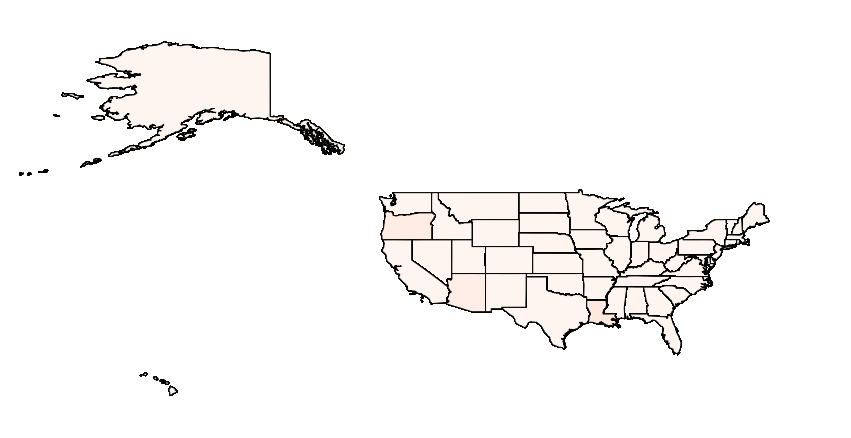

In [163]:
# Plot a choropleth using Geoplot

gp = geoplot.choropleth(usa_shp_merge, 
                        hue=usa_shp_merge['Tons of CO2 Emissions'], 
                        scheme=None, cmap='Reds', 
                        figsize=(15, 15))

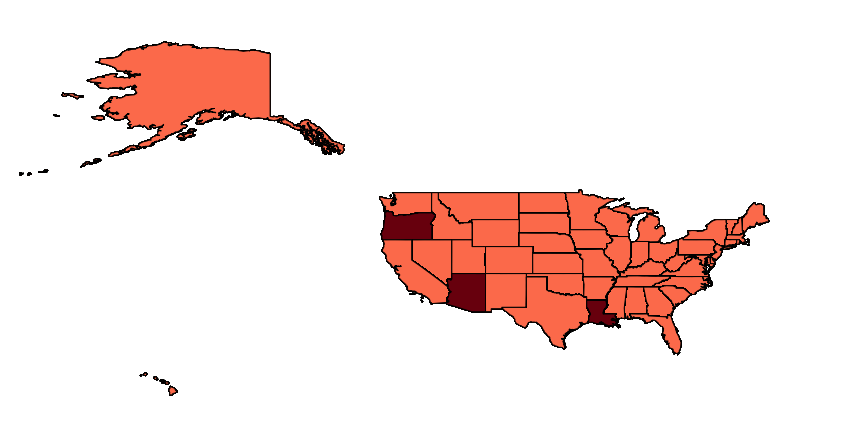

In [164]:
# Plot a choropleth using Geoplot

gp = geoplot.choropleth(usa_shp_merge, 
                        hue=usa_shp_merge['Emission Levels'], 
                        scheme=None, cmap='Reds', 
                        figsize=(15, 15))

The choropleth plots above are not very helpful because they show that there are three states that emit the highest emission level, but the reality is different, see below. Further analysis needs to be done before the choropleth is able to reflect the reality. With the exact same dataframe (usa_shp_merge) being used above, other software is able to plot the reality, as reflected in the numbers below.

In [161]:
# Check the totals by state to see if the choropleth plot above reflects the numbers

usa_shp_merge_co2sum = usa_shp_merge.groupby('STATE_ABBR').agg({'Tons of CO2 Emissions': ['sum']})

In [162]:
usa_shp_merge_co2sum.reset_index().sort_values([('Tons of CO2 Emissions', 'sum')], ascending = False)

,STATE_ABBR,Tons of CO2 Emissions
,,sum
43,TX,1.018614e+09
9,FL,4.679961e+08
15,IN,3.711656e+08
38,PA,3.512820e+08
35,OH,3.391777e+08
14,IL,3.066508e+08
17,KY,2.874320e+08
24,MO,2.805514e+08
49,WV,2.761124e+08
